In [1]:
# importing data manipulation libraries

import numpy as np
import pandas as pd

# importing visualization libraries

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_palette("Greys_d")

In [3]:
# reading data

df = pd.read_csv('/content/sample_data/Global Terrorism Data.csv', low_memory = False)

In [4]:
print(f'The world has suffered a total of {df.shape[0]} terrorist attacks between 1970 to 2020.')
print(f'In the year 2020 the world suffered a total of {df[df["year"] == 2020].shape[0]} terrorist attacks. That\'s about {int(df[df["year"] == 2020].shape[0]/366)} attacks per day.')

The world has suffered a total of 207522 terrorist attacks between 1970 to 2020.
In the year 2020 the world suffered a total of 8438 terrorist attacks. That's about 23 attacks per day.


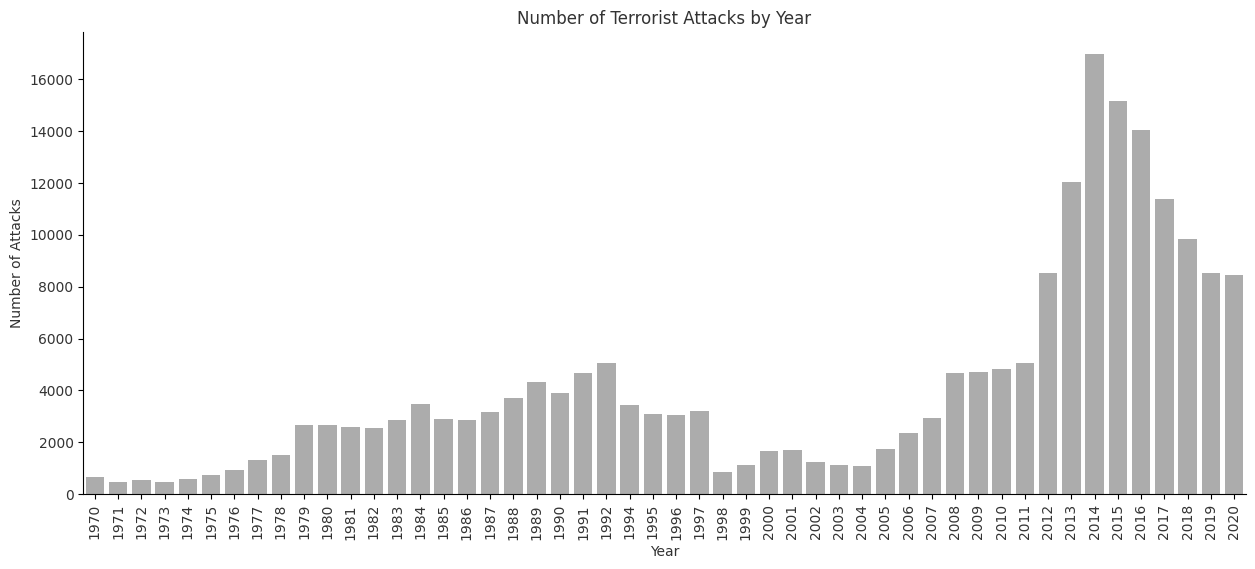

In [5]:
plt.figure(figsize = (15, 6))

sns.countplot(data = df, x = "year")

plt.title("Number of Terrorist Attacks by Year", color = "#333333")
plt.xlabel("Year", color = "#333333")
plt.ylabel("Number of Attacks", color = "#333333")
plt.xticks(rotation = 90, color = "#333333")
plt.yticks(color = "#333333")

plt.gca().spines[["right", "top"]].set_visible(False)

plt.show()

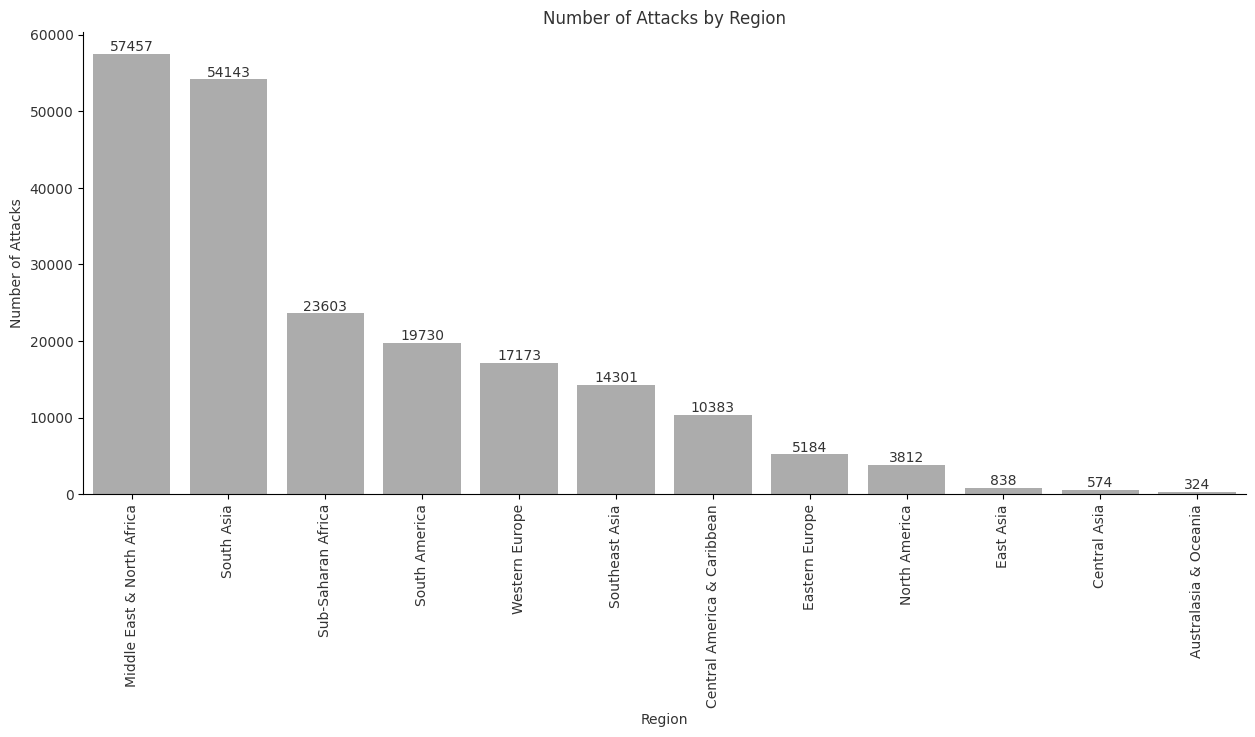

In [6]:
plt.figure(figsize = (15, 6))

sns.countplot(data = df, x = 'region_txt', order = df['region_txt'].value_counts().sort_values(ascending = False).index)

for x, y in enumerate(df.groupby('region_txt')['region_txt'].value_counts().sort_values(ascending = False)):
    plt.text(x, y, str(y), ha = 'center', va = 'bottom', color = '#333333')

plt.title('Number of Attacks by Region', color = '#333333')
plt.xlabel('Region', color = '#333333')
plt.xticks(rotation = 90, color = '#333333')
plt.ylabel('Number of Attacks', color = '#333333')
plt.yticks(color = '#333333')

plt.gca().spines[['right', 'top']].set_visible(False)

plt.show()

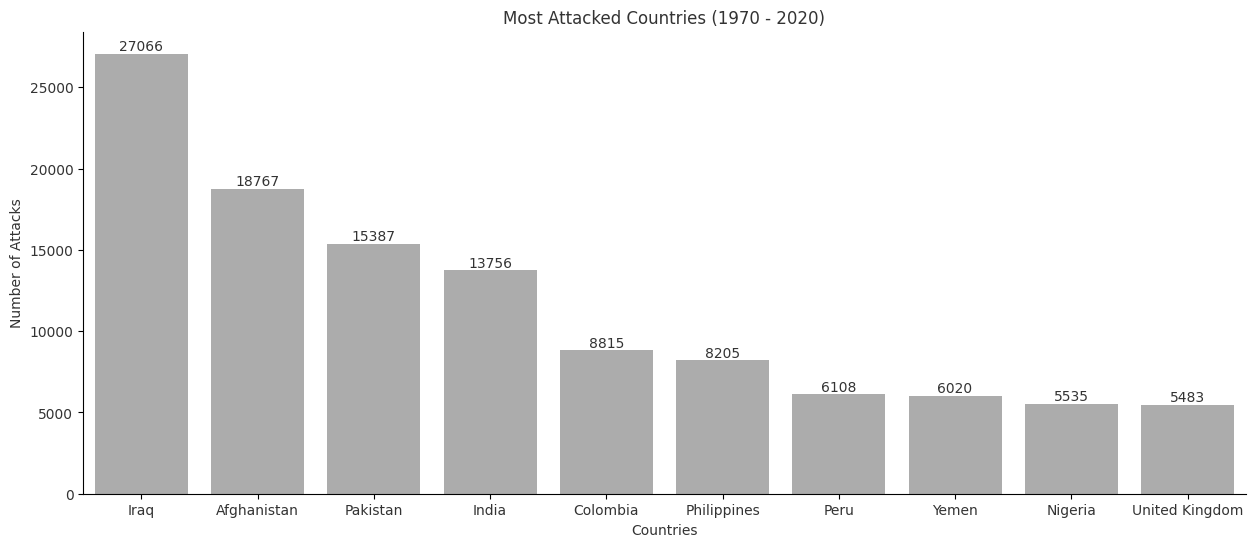

In [7]:
most_attacked_countries = df['country_txt'].value_counts().sort_values(ascending = False).head(10).index.tolist()

df_most_attacked_countries = df[df['country_txt'].isin(most_attacked_countries)]

plt.figure(figsize = (15, 6))

sns.countplot(data = df_most_attacked_countries, x = 'country_txt', order = most_attacked_countries)

for x, y in enumerate(df.groupby('country_txt')['country_txt'].value_counts().sort_values(ascending = False).head(10)):
    plt.text(x, y, str(y), ha = 'center', va = 'bottom', color = '#333333')

plt.title('Most Attacked Countries (1970 - 2020)', color = '#333333')
plt.xlabel('Countries', color = '#333333')
plt.xticks(color = '#333333')
plt.ylabel('Number of Attacks', color = '#333333')
plt.yticks(color = '#333333')

plt.gca().spines[['top', 'right']].set_visible(False)

plt.show()

In [8]:
print(f'Between the year 1970 - 2020 there have been {int(df["nkill"].sum())} confirmed deaths because of terrorist attacks.')
print(f'In the year 2020 there were {int(df[df["year"] == 2020]["nkill"].sum())} confirmed deaths due to terrorist attacks.')

Between the year 1970 - 2020 there have been 470415 confirmed deaths because of terrorist attacks.
In the year 2020 there were 22847 confirmed deaths due to terrorist attacks.


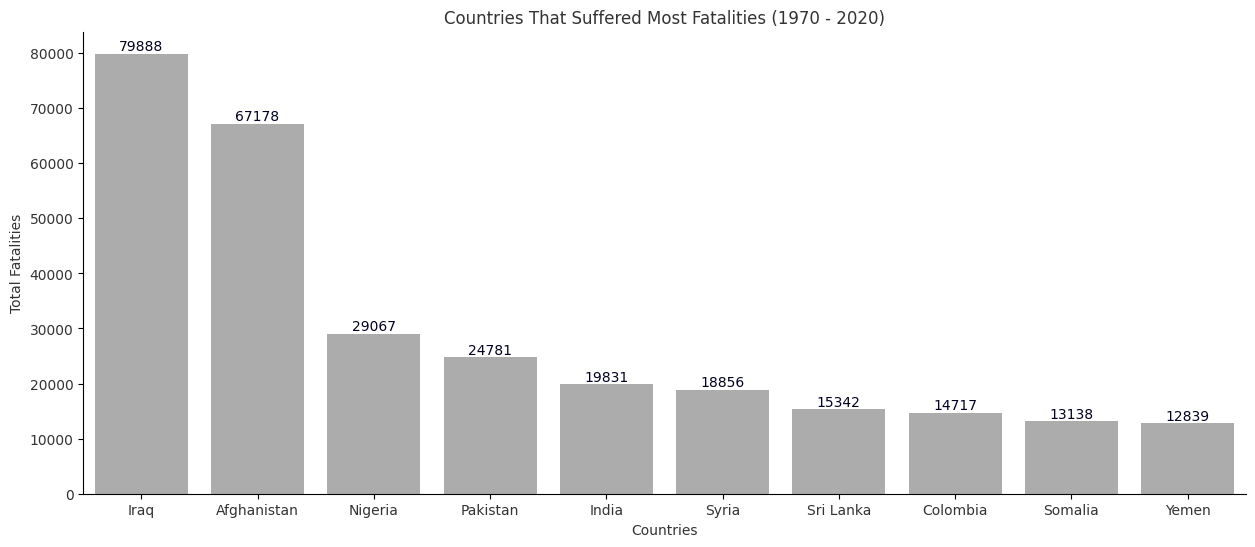

In [9]:
most_deaths = df.groupby('country_txt')['nkill'].sum().sort_values(ascending = False).head(10).index.tolist()

df_most_deaths = df[df['country_txt'].isin(most_deaths)]

plt.figure(figsize = (15, 6))

sns.barplot(data = df_most_deaths, x = 'country_txt', y = 'nkill', order = most_deaths,
            estimator = 'sum', errorbar = ('ci', False))

for x, y in enumerate(df.groupby('country_txt')['nkill'].sum().sort_values(ascending = False).head(10)):
    plt.text(x, y, int(y), color = '#000022', ha = 'center', va = 'bottom')

plt.title('Countries That Suffered Most Fatalities (1970 - 2020)', color = '#333333')
plt.xlabel('Countries', color = '#333333')
plt.xticks(color = '#333333')
plt.ylabel('Total Fatalities', color = '#333333')
plt.yticks(color = '#333333')

plt.gca().spines[['top', 'right']].set_visible(False)

plt.show()

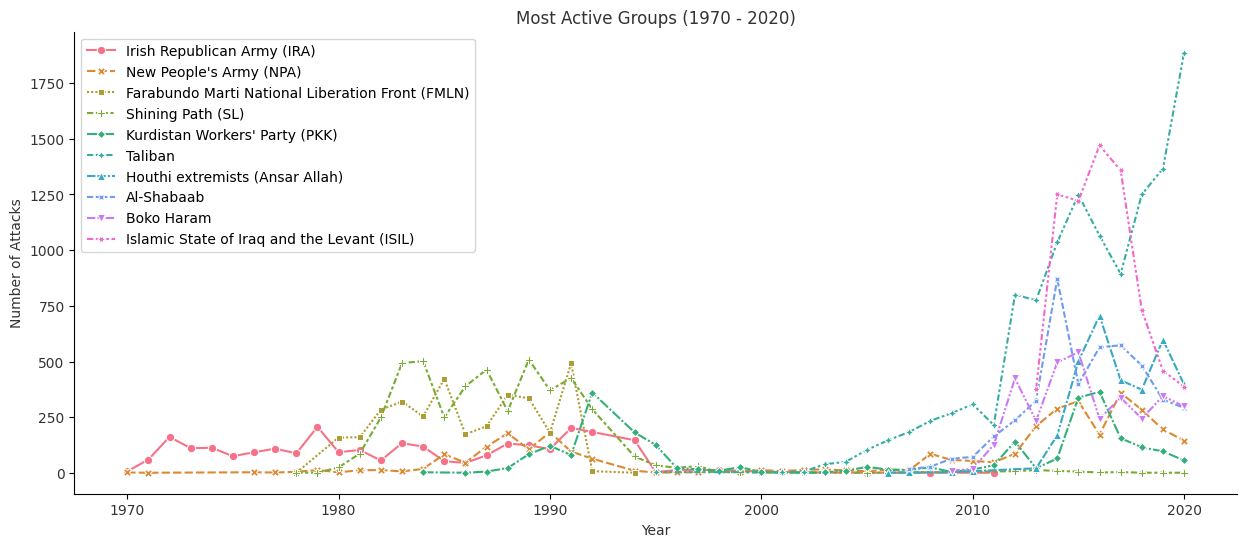

In [10]:
most_active_groups = df['gname'].value_counts().sort_values(ascending = False).head(11).index.tolist()

most_active_groups = most_active_groups[1:]

df_most_active_groups = df[df['gname'].isin(most_active_groups)]

df_counts = df_most_active_groups.groupby(['year', 'gname'])['gname'].size().reset_index(name = 'number_of_attacks')

plt.figure(figsize = (15, 6))

sns.lineplot(data = df_counts, x = 'year', y = 'number_of_attacks', style = 'gname', hue = 'gname', markers = True)

plt.title('Most Active Groups (1970 - 2020)', color = '#333333')
plt.xlabel('Year', color = '#333333')
plt.xticks(color = '#333333')
plt.ylabel('Number of Attacks', color = '#333333')
plt.yticks(color = '#333333')

plt.legend().set_title([])

plt.gca().spines[['top', 'right']].set_visible(False)

plt.show()

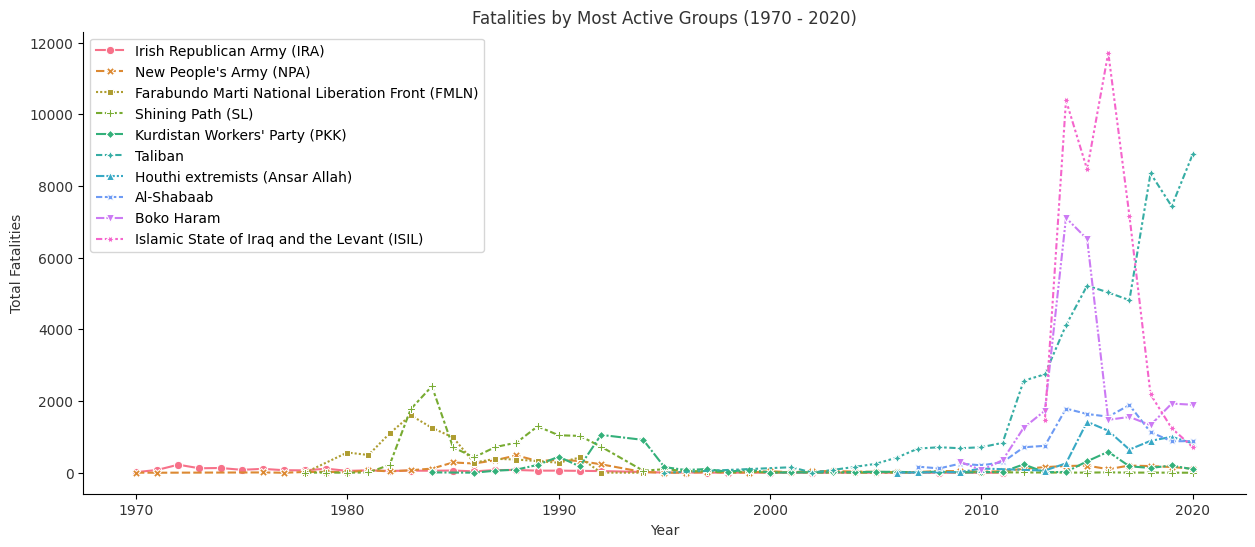

In [11]:
df_counts = df_most_active_groups.groupby(['year', 'gname'])['nkill'].sum().reset_index(name = 'fatalities')

plt.figure(figsize = (15, 6))

sns.lineplot(data = df_counts, x = 'year', y = 'fatalities', style = 'gname', hue = 'gname', markers = True)

plt.title('Fatalities by Most Active Groups (1970 - 2020)', color = '#333333')
plt.xlabel('Year', color = '#333333')
plt.xticks(color = '#333333')
plt.ylabel('Total Fatalities', color = '#333333')
plt.yticks(color = '#333333')

plt.legend().set_title([])

plt.gca().spines[['top', 'right']].set_visible(False)

plt.show()

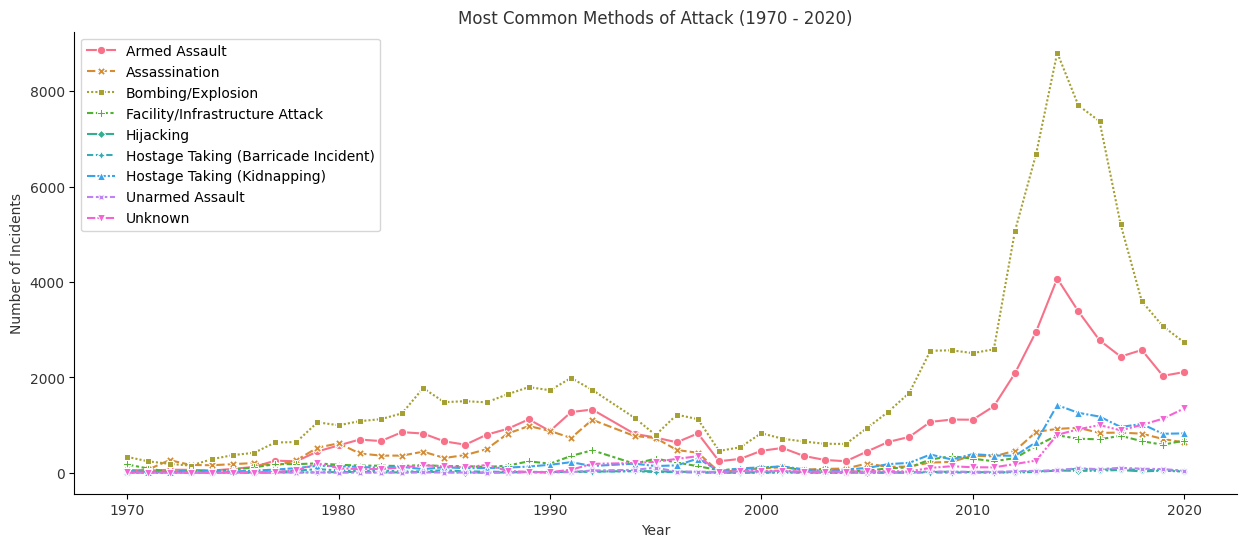

In [12]:
df_counts = df.groupby(['year', 'attacktype1_txt'])['attacktype1_txt'].size().reset_index(name = 'number_of_incidents')

plt.figure(figsize = (15, 6))

sns.lineplot(data = df_counts, x = 'year', y = 'number_of_incidents', style = 'attacktype1_txt', hue = 'attacktype1_txt', markers = True)

plt.title('Most Common Methods of Attack (1970 - 2020)', color = '#333333')
plt.xlabel('Year', color = '#333333')
plt.xticks(color = '#333333')
plt.ylabel('Number of Incidents', color = '#333333')
plt.yticks(color = '#333333')
plt.legend().set_title([])

plt.gca().spines[['right', 'top']].set_visible(False)

plt.show()

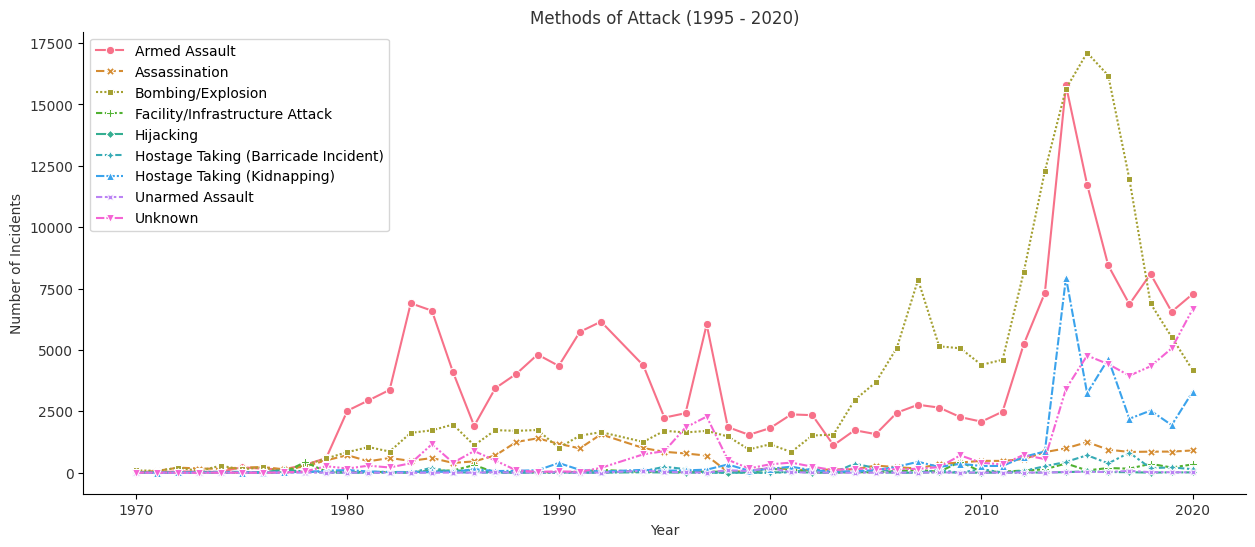

In [13]:
df_counts = df.groupby(['year', 'attacktype1_txt'])['nkill'].sum().reset_index(name = 'number_of_deaths')

plt.figure(figsize = (15, 6))

sns.lineplot(data = df_counts, x = 'year', y = 'number_of_deaths', estimator = 'sum', errorbar = ('ci', False),
             style = 'attacktype1_txt', hue = 'attacktype1_txt', markers = True)

plt.title('Methods of Attack (1995 - 2020)', color = '#333333')
plt.xlabel('Year', color = '#333333')
plt.xticks(color = '#333333')
plt.ylabel('Number of Incidents', color = '#333333')
plt.yticks(color = '#333333')

plt.legend().set_title([])

plt.gca().spines[['top', 'right']].set_visible(False)

plt.show()

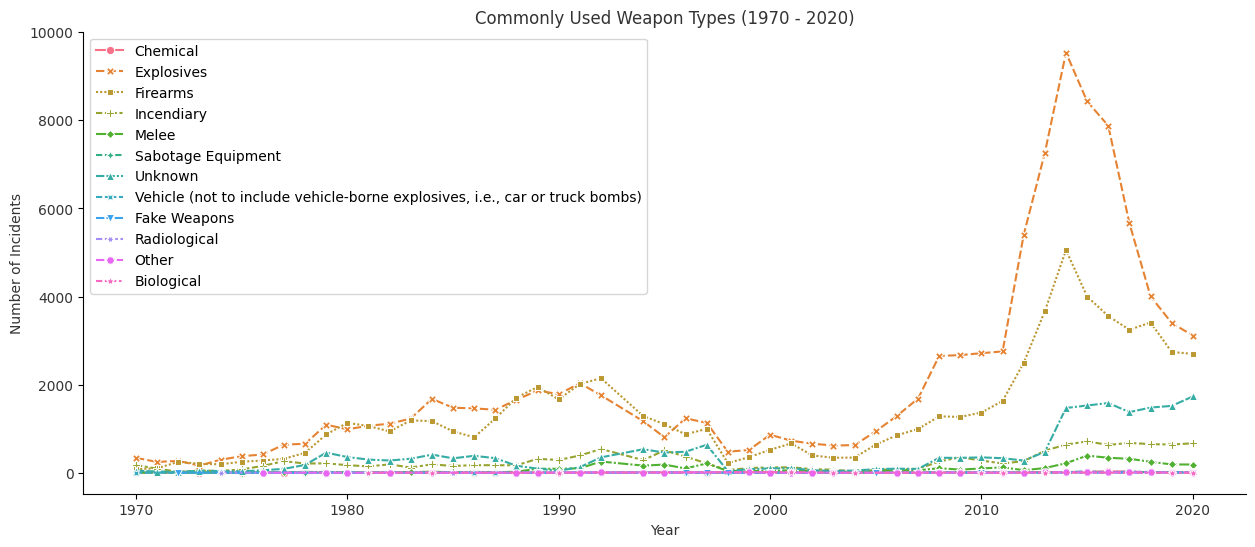

In [14]:
df_counts = df.groupby(['year', 'weaptype1_txt'])['weaptype1_txt'].size().reset_index(name = 'number_of_incidents')

plt.figure(figsize = (15, 6))

sns.lineplot(data = df_counts, x = 'year', y = 'number_of_incidents', estimator = 'sum', errorbar = ('ci', False),
             style = 'weaptype1_txt', hue = 'weaptype1_txt', markers = True)

plt.title('Commonly Used Weapon Types (1970 - 2020)', color = '#333333')
plt.xlabel('Year', color = '#333333')
plt.xticks(color = '#333333')
plt.ylabel('Number of Incidents', color = '#333333')
plt.yticks(color = '#333333')

plt.gca().spines[['top', 'right']].set_visible(False)

plt.legend().set_title([])

plt.show()

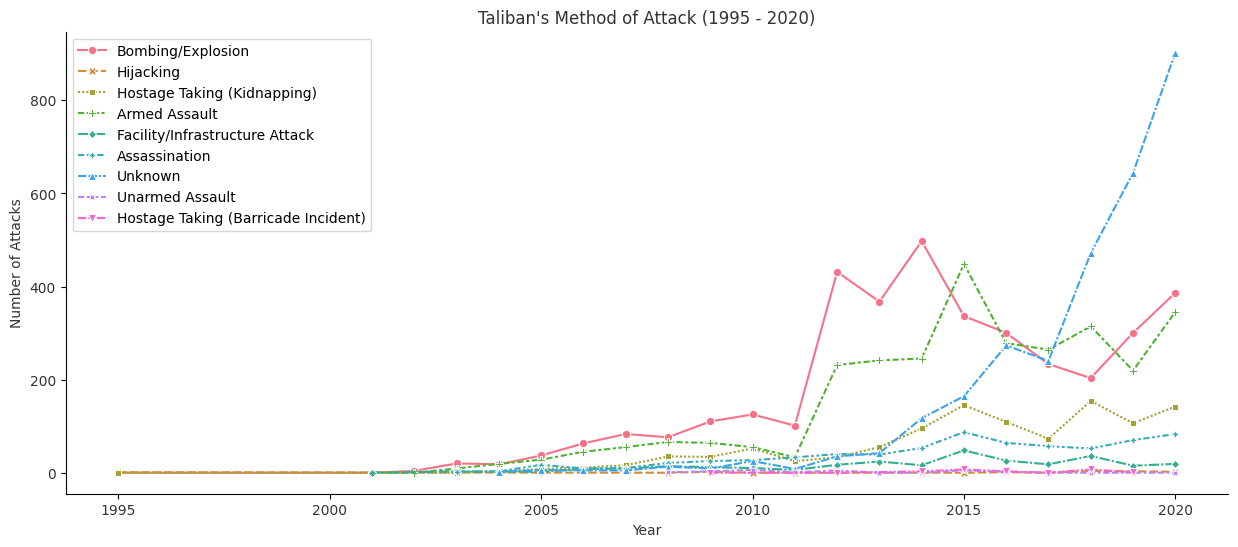

In [15]:
df_taliban = df[df['gname'] == 'Taliban'].groupby(['year', 'attacktype1_txt'])['attacktype1_txt'].size().reset_index(name = 'method_of_attacks')

plt.figure(figsize = (15, 6))

sns.lineplot(data = df_taliban, x = 'year', y = 'method_of_attacks', estimator = 'sum',
             style = 'attacktype1_txt', hue = 'attacktype1_txt', markers = True, errorbar = ('ci', False))

plt.title("Taliban's Method of Attack (1995 - 2020)", color = '#333333')
plt.xlabel('Year', color = '#333333')
plt.xticks(color = '#333333')
plt.ylabel('Number of Attacks', color = '#333333')
plt.yticks(color = '#333333')

plt.legend().set_title([])

plt.gca().spines[['top', 'right']].set_visible(False)

plt.show()

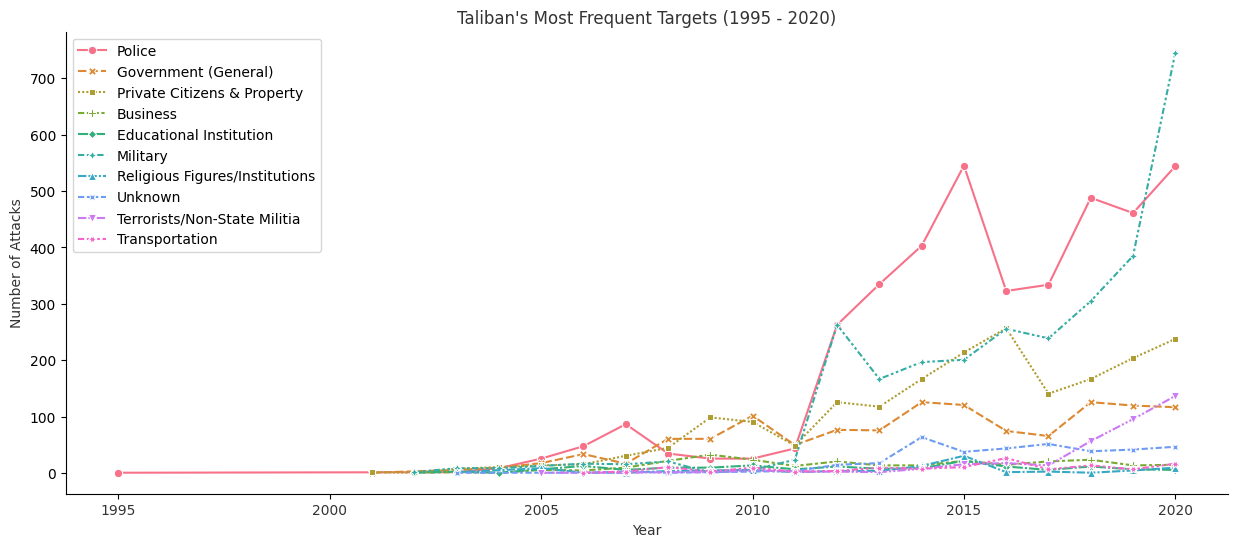

In [16]:
most_attacked_taliban = df[df['gname'] == 'Taliban']['targtype1_txt'].value_counts().sort_values(ascending = False).head(10).index.tolist()

df_taliban = df[(df['gname'] == 'Taliban') & (df['targtype1_txt'].isin(most_attacked_taliban))]

df_count = df_taliban.groupby(['year', 'targtype1_txt'])['targtype1_txt'].size().reset_index(name = 'number_of_attacks')

plt.figure(figsize = (15, 6))

sns.lineplot(data = df_count, x = 'year', y = 'number_of_attacks', estimator = 'sum', errorbar = ('ci', False), style = 'targtype1_txt',
             hue = 'targtype1_txt', markers = True)

plt.title("Taliban's Most Frequent Targets (1995 - 2020)", color = '#333333')
plt.xlabel('Year', color = '#333333')
plt.xticks(color = '#333333')
plt.ylabel('Number of Attacks', color = '#333333')
plt.xticks(color = '#333333')

plt.gca().spines[['top', 'right']].set_visible(False)

plt.legend().set_title([])

plt.show()

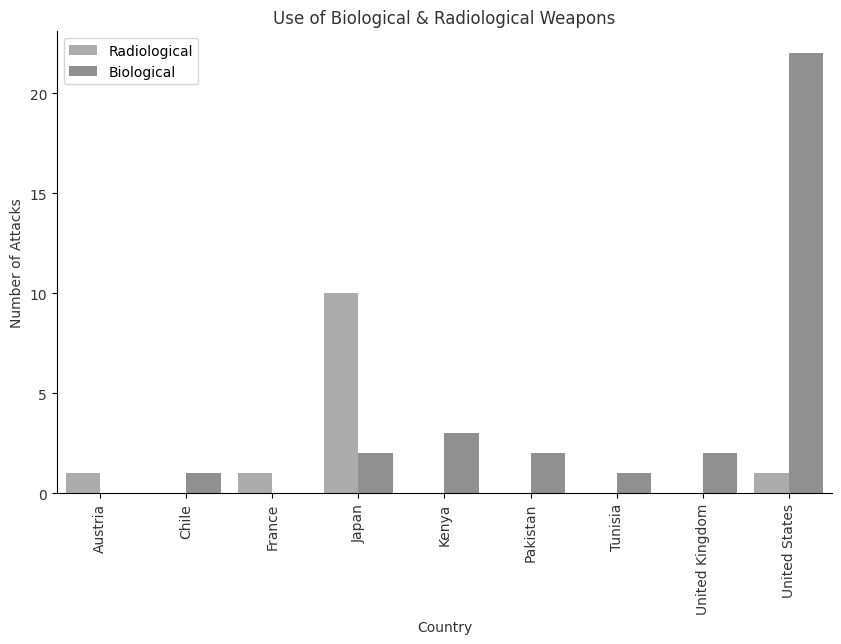

In [19]:
df_subset = df[df['weaptype1_txt'].isin(['Biological', 'Radiological'])]

plt.figure(figsize = (10, 6))

sns.countplot(data = df_subset, x = 'country_txt', hue = 'weaptype1_txt',
              order = ['Austria', 'Chile', 'France', 'Japan', 'Kenya', 'Pakistan', 'Tunisia', 'United Kingdom', 'United States'])

plt.title('Use of Biological & Radiological Weapons', color = '#333333')
plt.xlabel('Country', color = '#333333')
plt.xticks(rotation = 90, color = '#333333')
plt.ylabel('Number of Attacks', color = '#333333')
plt.yticks(color = '#333333')

plt.legend().set_title([])

plt.gca().spines[['top', 'right']].set_visible(False)

plt.show()